In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


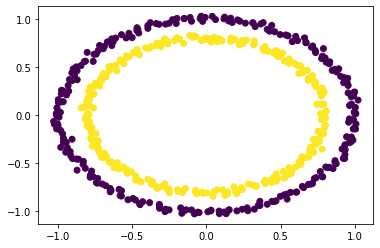

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model=LogisticRegression()

In [11]:
model.fit(X,Y)
model.score(X,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.502

# Increasing dimension

In [12]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [13]:
X_ = phi(X)

(500, 3)


In [14]:
X_.shape

(500, 3)

In [15]:
print(X_[:3,:])

[[-0.24931043 -0.8058257   0.71151076]
 [ 0.71542818  0.71900228  1.02880176]
 [-0.53441022 -0.60270041  0.64884206]]


In [16]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    

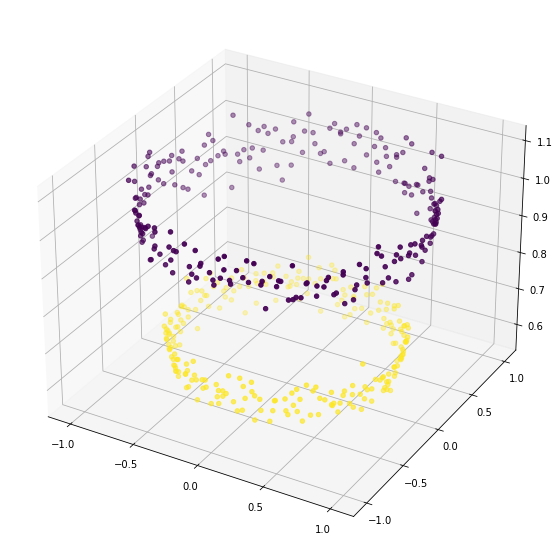

In [17]:
ax = plot3d(X_)

### Logistic Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [23]:
model = LogisticRegression()

In [24]:
# acc = cross_val_score(lr,X,Y,cv=5).mean()
# print("Accuracy X(2D) is %.4f"%(acc*100))
model.fit(X,Y)
model.score(X,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.502

### Logistic Classifier on Higher Dimension Space

In [25]:
model.fit(X_,Y)
model.score(X_,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

### Visualise the Decision Surface

In [26]:
lr.fit(X_,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
wts = lr.coef_
print(wts)

[[-0.02134159 -0.03937666 -8.89857085]]


In [28]:
bias = lr.intercept_

In [29]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [30]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)


[[0.82257981 0.8201815  0.81778318 0.81538486]
 [0.81815476 0.81575644 0.81335812 0.81095981]
 [0.8137297  0.81133139 0.80893307 0.80653475]
 [0.80930465 0.80690633 0.80450801 0.8021097 ]]


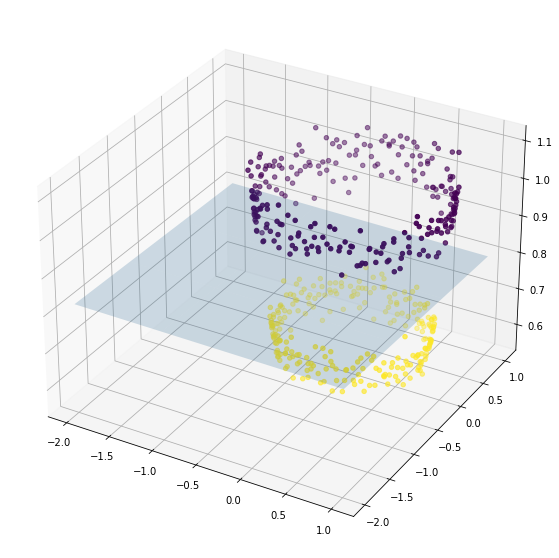

In [31]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

# Normally using inbuild sklearn module

## Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

- Linear Kernel
- RBF Kernel
- Polynomial Kernel
- Sigmoid Kernel

**Kernel trick** is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

https://towardsdatascience.com/kernel-function-6f1d2be6091

In [33]:
from sklearn import svm

### Linear Kernel SVM

In [34]:
svc = svm.SVC(kernel="linear")

In [35]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
svc.score(X,Y)

0.502

### RBF Kernel SVM

In [38]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

## Polynomial 

In [39]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

C:\Users\debjit\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.554

### Custom Kernel

In [40]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

## Mathematical Formulation
https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation

https://scikit-learn.org/stable/modules/svm.html
